Bagging: First of all you are gonna need to download "simulator.py" from the folder "src" to run this code. 

Percentages MSE: 5.69
MSE: 354514.28
Sharpe: 1.18
MAE: 1.72
RMSE: 2.39


d:\Dropbox\AppSettings\User\VSCodeNotebooks(clases mineria de datos)\Project1-PredictingBitcoinPrices\notebooks\simulator.py:70: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Sharpe: %.2f'%(np.mean(pct_returns)/np.std(pct_returns)))


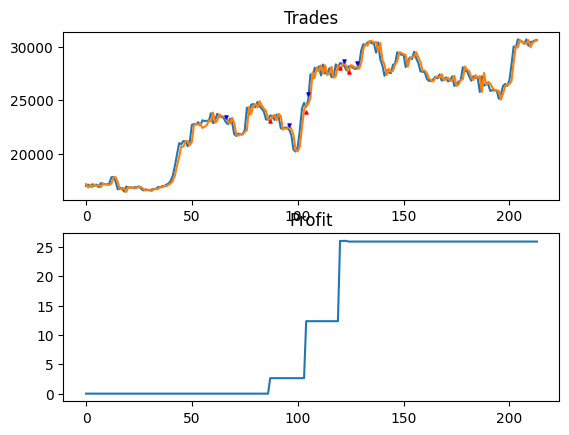

In [12]:
import numpy as np
import pandas as pd

from simulator import simulate
from sklearn import metrics
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

np.random.seed(2059033)

lr = BaggingRegressor(n_estimators=28,estimator=DecisionTreeRegressor(max_depth=2))

data = pd.read_csv('BTC-USD.csv')

data = data.dropna() #Delete columns and rows with missing values
data.Date = pd.to_datetime(data.Date) #Convert Date column to datetime
data.set_index('Date', drop=True, inplace=True) #Set Date column as index
diffs = (data.Close.diff()/data.Close).values[1:] #Calculate differences between consecutive values

diff_len = len(diffs) #Length of differences array



def create_x_data(lags=1): #Create x_data with lags
    diff_data = np.zeros((diff_len, lags))#Create empty array

    for lag in range(1, lags+1):#Loop over lags
        this_data = diffs[:-lag]#Create lagged data
        diff_data[lag:, lag-1] = this_data#Add to array

    return  diff_data

x_data = create_x_data(lags=20)*100 #Create x_data with 20 lags
y_data = diffs*100 #Create y_data

# REPRODUCIBILITY
x_data = np.around(x_data, decimals=8)
y_data = np.around(y_data, decimals=8)

# =============================================================================
# WALK FORWARD
# =============================================================================

window = 150
preds = np.zeros(diff_len-window)
for i in range(diff_len-window-1):
    x_train = x_data[i:i+window, :]
    y_train = y_data[i:i+window]
    lr.fit(x_train, y_train)
    preds[i] = lr.predict(x_data[i+window+1, :].reshape(1, -1))



print('Percentages MSE: %.2f'%metrics.mean_squared_error(y_data[window:], preds))
simulate(data, preds)
mae = metrics.mean_absolute_error(y_data[window:], preds)
print('MAE: %.2f' % mae)
rmse = np.sqrt(metrics.mean_squared_error(y_data[window:], preds))
print('RMSE: %.2f' % rmse)


Para guardar el modelo

In [13]:
import pickle

ruta_archivo_modelo = "D:\\Dropbox\\AppSettings\\User\\VSCodeNotebooks(clases mineria de datos)\\Project1-PredictingBitcoinPrices\\models\\trained_model.pkl" #reemplazar por la ruta de tu archivo

with open(ruta_archivo_modelo, 'wb') as f:
    pickle.dump(lr, f)
